In [1]:
# Import data manipulation libraries
import numpy as np
import pandas as pd
# Import yahoo finance library
import yfinance as yf
# Import cufflinks for visualization
import cufflinks as cf
cf.set_config_file(offline=True, theme='solar')
# Ignore warnings - optional
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Fetch the data by specifying the number of period
df1 = yf.download('SPY', period='5d', progress=False)
# Display the first five rows of the dataframe to check the results.
df1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-26 00:00:00-04:00,432.619995,434.609985,431.190002,431.440002,431.440002,72823600
2023-06-27 00:00:00-04:00,432.350006,436.809998,431.880005,436.170013,436.170013,72813700
2023-06-28 00:00:00-04:00,435.049988,437.440002,434.410004,436.390015,436.390015,75636000
2023-06-29 00:00:00-04:00,435.959991,438.279999,435.540009,438.109985,438.109985,67774800
2023-06-30 00:00:00-04:00,441.440002,443.609985,441.130005,443.359985,443.359985,45358081


In [3]:
# Fetch data by specifying the the start and end dates
df2 = yf.download('SPY', start='2022-06-01', end='2022-06-30', progress=False)
# Display the first five rows of the dataframe to check the results.
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-01 00:00:00-04:00,415.170013,416.239990,406.929993,409.589996,401.275543,86585800
2022-06-02 00:00:00-04:00,409.420013,417.440002,407.040009,417.390015,408.917236,79609600
2022-06-03 00:00:00-04:00,412.399994,414.040009,409.510010,410.540009,402.206268,71874300
2022-06-06 00:00:00-04:00,414.779999,416.609985,410.549988,411.790009,403.430939,57508900
2022-06-07 00:00:00-04:00,408.100006,416.220001,407.609985,415.739990,407.300720,59272400


In [4]:
# Fetch data for year to date (YTD)
df3 = yf.download('SPY', period='ytd', progress=False)
# Display the last five rows of the dataframe to check the results.
df3.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-26 00:00:00-04:00,432.619995,434.609985,431.190002,431.440002,431.440002,72823600
2023-06-27 00:00:00-04:00,432.350006,436.809998,431.880005,436.170013,436.170013,72813700
2023-06-28 00:00:00-04:00,435.049988,437.440002,434.410004,436.390015,436.390015,75636000
2023-06-29 00:00:00-04:00,435.959991,438.279999,435.540009,438.109985,438.109985,67774800
2023-06-30 00:00:00-04:00,441.440002,443.609985,441.130005,443.364197,443.364197,45358788


In [5]:
# Specify stocks
# https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average
dow_stocks = ['UNH', 'GS', 'HD', 'AMGN', 'MCD']

In [6]:
# Fetch data for multiple stocks at once
df4 = yf.download(dow_stocks, period='ytd', progress=False)['Adj Close']
# Display dataframe
df4.tail()

,AMGN,GS,HD,MCD,UNH
Date,,,,,
2023-06-26 00:00:00-04:00,224.729996,312.359985,307.890015,289.089996,479.059998
2023-06-27 00:00:00-04:00,222.610001,313.450012,313.739990,291.299988,482.559998
2023-06-28 00:00:00-04:00,221.309998,313.660004,306.510010,291.739990,474.450012
2023-06-29 00:00:00-04:00,221.160004,323.089996,307.820007,294.470001,476.440002
2023-06-30 00:00:00-04:00,221.910004,324.153412,309.940002,297.339996,480.089996


In [7]:
# Fetch data for multiple fields using comprehension
ohlcv = {symbol: yf.download(symbol, period='250d', progress=False) for symbol in dow_stocks}

In [8]:
ohlcv.keys()

dict_keys(['UNH', 'GS', 'HD', 'AMGN', 'MCD'])

In [9]:
# Display GS adjusted close data
ohlcv['GS']['Adj Close']

Date
2022-07-05 00:00:00-04:00    288.769012
2022-07-06 00:00:00-04:00    285.426575
2022-07-07 00:00:00-04:00    290.129272
2022-07-08 00:00:00-04:00    288.059692
2022-07-11 00:00:00-04:00    284.863007
                                ...    
2023-06-26 00:00:00-04:00    312.359985
2023-06-27 00:00:00-04:00    313.450012
2023-06-28 00:00:00-04:00    313.660004
2023-06-29 00:00:00-04:00    323.089996
2023-06-30 00:00:00-04:00    324.153412
Name: Adj Close, Length: 250, dtype: float64

In [10]:
# Retrieve intraday data for last five days
df6 = yf.download('SPY', period='5d', interval='1m', progress=False)
# Display dataframe
df6

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-06-26 09:30:00-04:00,432.619995,432.989990,432.600006,432.910004,432.910004,1171057
2023-06-26 09:31:00-04:00,432.899994,433.040009,432.750000,432.800507,432.800507,174368
2023-06-26 09:32:00-04:00,432.809509,432.850006,432.730011,432.730011,432.730011,111918
2023-06-26 09:33:00-04:00,432.730011,433.109985,432.730011,433.089996,433.089996,144005
2023-06-26 09:34:00-04:00,433.089996,433.389191,433.079987,433.369995,433.369995,207961
...,...,...,...,...,...,...
2023-06-30 12:59:00-04:00,443.489990,443.540009,443.459991,443.494995,443.494995,116467
2023-06-30 13:00:00-04:00,443.500000,443.519989,443.420013,443.480011,443.480011,97452
2023-06-30 13:01:00-04:00,443.484985,443.559906,443.475006,443.549988,443.549988,92755


In [11]:
spy = yf.Ticker('SPY')

In [12]:
# Get SPY option chain for Sept 30th expiration
# https://finance.yahoo.com/quote/SPY/options?date=1680220800
# spy = yf.Ticker('SPY')
options = spy.option_chain('2023-06-30')

In [13]:
type(options)

yfinance.ticker.Options

In [14]:
options.calls.query("strike > 390")

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
71,SPY230630C00391000,2023-06-21 15:32:38+00:00,391.0,44.92,52.02,52.19,0.000000,0.000000,6.0,4,0.000010,True,REGULAR,USD
72,SPY230630C00392000,2023-06-15 19:49:39+00:00,392.0,50.98,51.05,51.23,0.000000,0.000000,57.0,0,0.000010,True,REGULAR,USD
73,SPY230630C00393000,2023-06-30 15:10:34+00:00,393.0,50.07,49.98,50.17,2.410000,5.056651,1.0,1,0.000010,True,REGULAR,USD
74,SPY230630C00394000,2023-06-21 16:55:57+00:00,394.0,42.08,49.10,49.28,0.000000,0.000000,1.0,1,0.000010,True,REGULAR,USD
75,SPY230630C00395000,2023-06-29 15:05:57+00:00,395.0,46.26,48.08,48.25,4.369999,10.432081,1.0,16,0.000010,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,SPY230630C00525000,2023-06-16 13:30:05+00:00,525.0,0.01,0.00,0.01,0.000000,0.000000,25.0,19758,1.000005,False,REGULAR,USD
162,SPY230630C00530000,2023-04-25 17:14:01+00:00,530.0,0.01,0.00,0.02,0.000000,0.000000,30.0,688,1.125004,False,REGULAR,USD
163,SPY230630C00535000,2023-06-30 15:11:53+00:00,535.0,0.01,0.00,0.01,0.000000,0.000000,6.0,1223,1.125004,False,REGULAR,USD
164,SPY230630C00540000,2023-06-16 14:23:55+00:00,540.0,0.01,0.00,0.01,0.000000,0.000000,2.0,1784,1.156254,False,REGULAR,USD


In [15]:
# Read data from wikipedia
nifty50 = pd.read_html('https://en.wikipedia.org/wiki/NIFTY_50')[2].Symbol.to_list()
# Read five symbols
nifty50[:5]

['ADANIENT', 'ADANIPORTS', 'APOLLOHOSP', 'ASIANPAINT', 'AXISBANK']

In [16]:
# Save ohlcv data for each securities in stockname.csv format
[pd.DataFrame(ohlcv[symbol]).to_csv('.data/'+symbol+'.csv') for symbol in dow_stocks]
print('*** file saved ***')

*** file saved ***


In [17]:
# Read CSV file
gs = pd.read_csv('.data/GS.csv', index_col=0, parse_dates=True)
# Display the last five rows of the data frame to check the results
gs.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-26 00:00:00-04:00,315.130005,316.640015,312.170013,312.359985,312.359985,2481000
2023-06-27 00:00:00-04:00,312.410004,315.679993,310.559998,313.450012,313.450012,2156800
2023-06-28 00:00:00-04:00,311.720001,314.899994,310.690002,313.660004,313.660004,2423500
2023-06-29 00:00:00-04:00,317.850006,325.500000,316.250000,323.089996,323.089996,3553100
2023-06-30 00:00:00-04:00,325.820007,326.029999,322.695007,324.153412,324.153412,922723


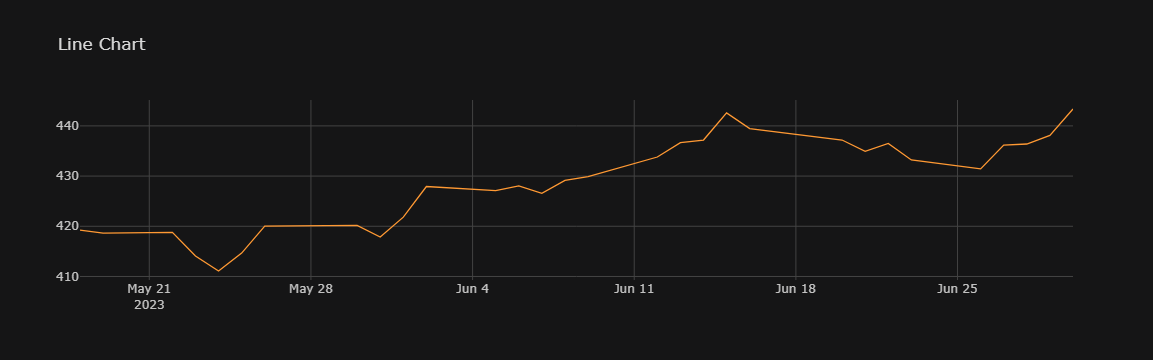

In [18]:
df3['Close'][-30:].iplot(kind='line', title='Line Chart')

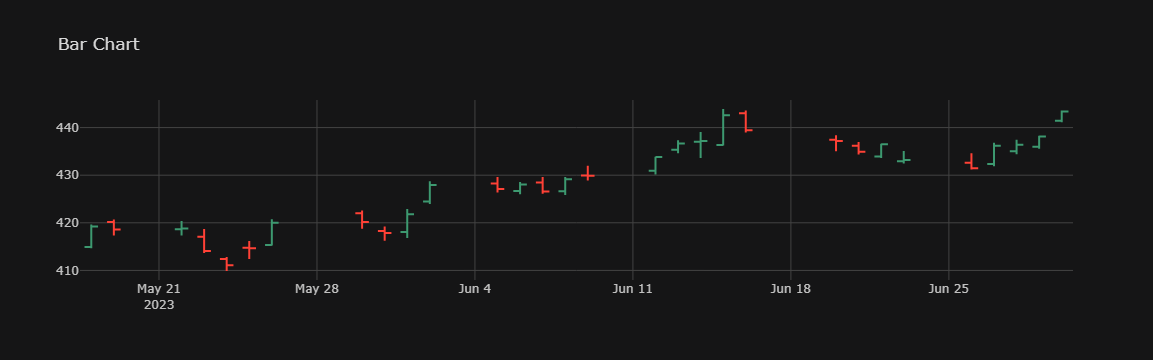

In [19]:
df3[-30:].iplot(kind='ohlc', title='Bar Chart')

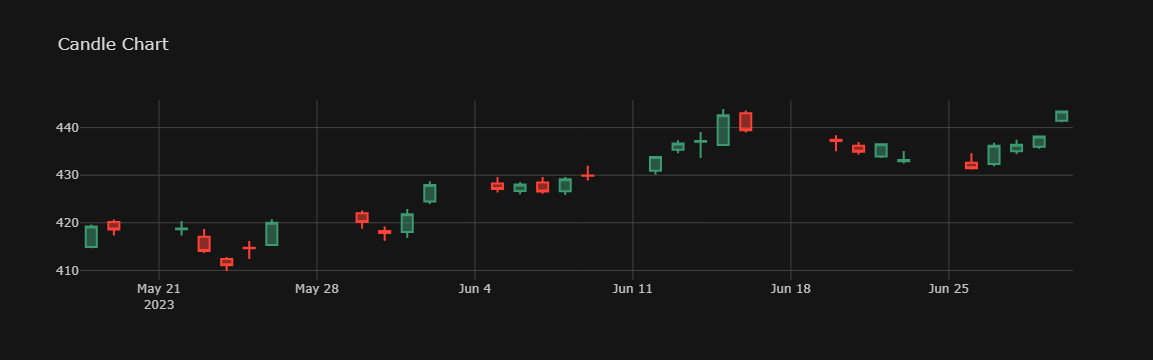

In [20]:
df3[-30:].iplot(kind='candle', title='Candle Chart')

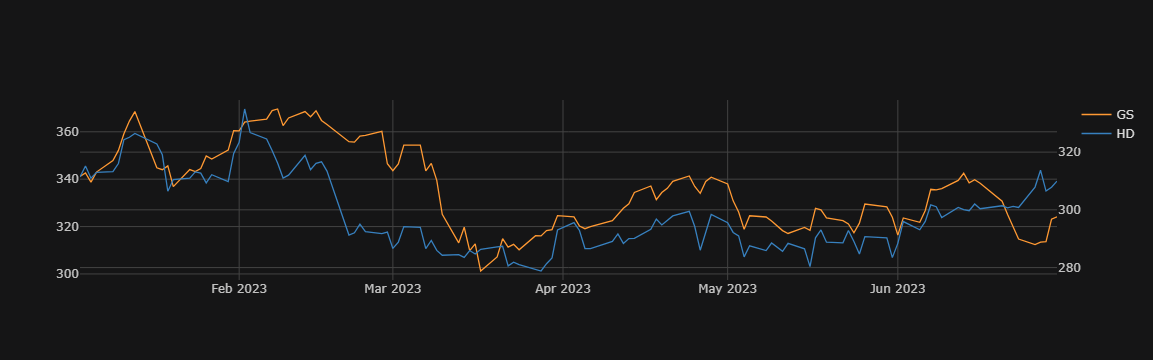

In [21]:
# Use secondary axis
df4[['GS', 'HD']].iplot(secondary_y='HD')

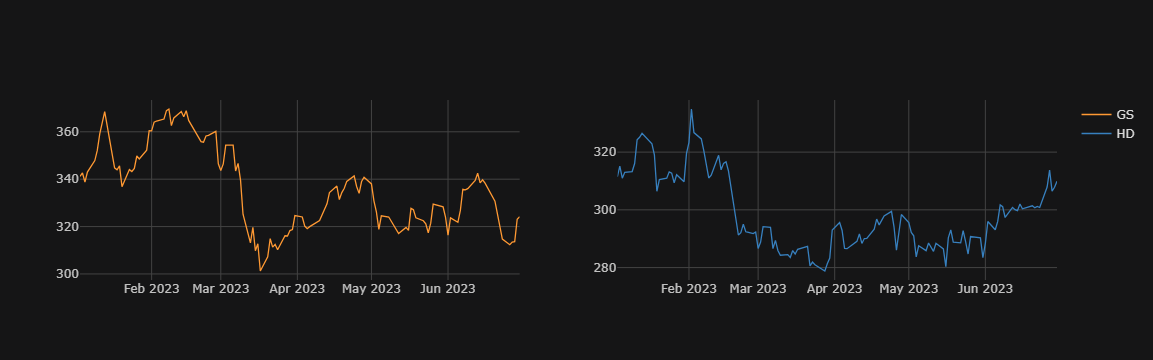

In [22]:
# Use subplots
df4[['GS', 'HD']].iplot(subplots=True)

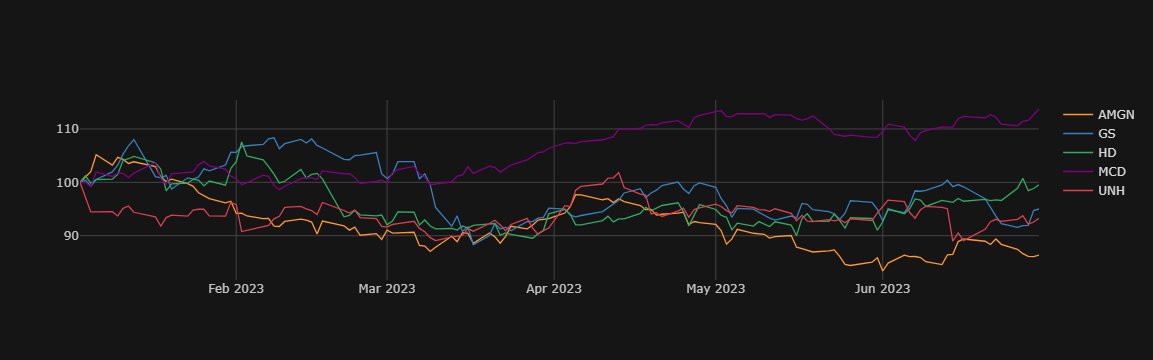

In [23]:
df4.normalize().iplot()

In [24]:
# Calculating Log Normal Returns
# Use numpy log function to derive log normal returns
daily_returns = np.log(df4).diff().dropna()
# Display the last five rows of the data frame to check the output
daily_returns.head()

,AMGN,GS,HD,MCD,UNH
Date,,,,,
2023-01-04 00:00:00-05:00,0.010418,0.004266,0.012019,0.000227,-0.027642
2023-01-05 00:00:00-05:00,0.009299,-0.011396,-0.013413,-0.008470,-0.029244
2023-01-06 00:00:00-05:00,0.030774,0.012489,0.006509,0.027502,0.000082
2023-01-09 00:00:00-05:00,-0.018632,0.014036,0.000882,-0.008272,0.000122
2023-01-10 00:00:00-05:00,0.013824,0.012276,0.008834,0.006192,-0.008319


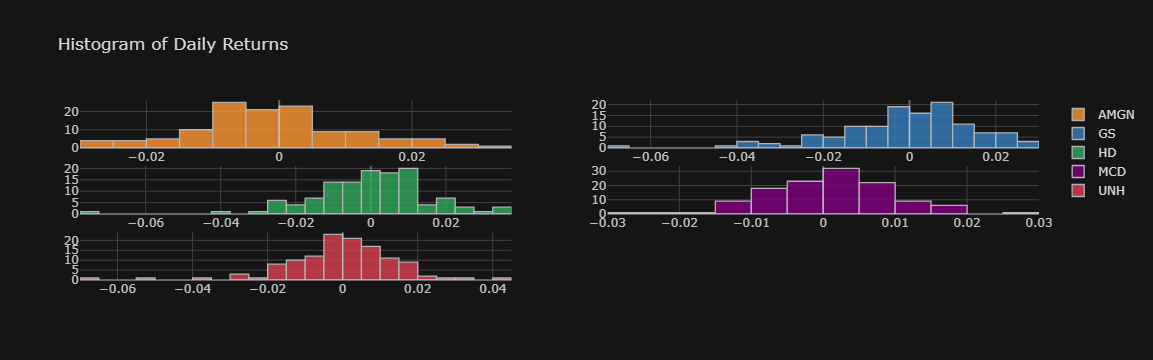

In [25]:
# Plot log normal distribution of returns
daily_returns.iplot(kind='histogram', title = 'Histogram of Daily Returns', subplots=True)

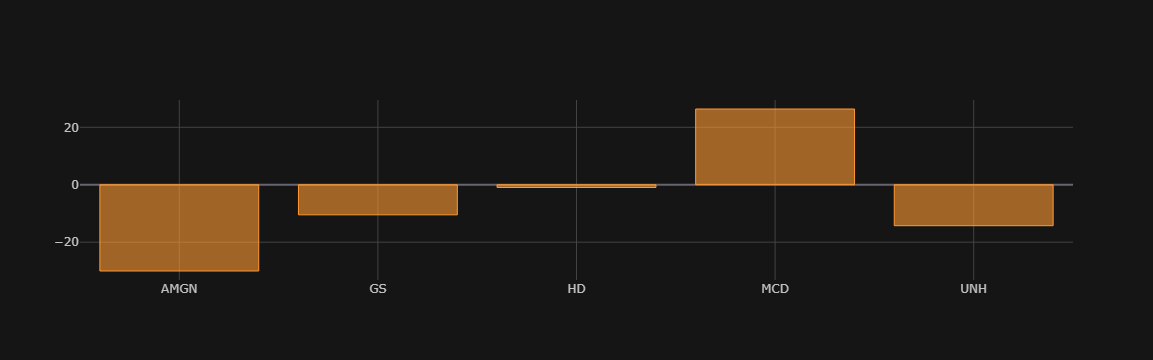

In [26]:
# Plot Mean Annual Returns
(daily_returns.mean()*252*100).iplot(kind='bar')

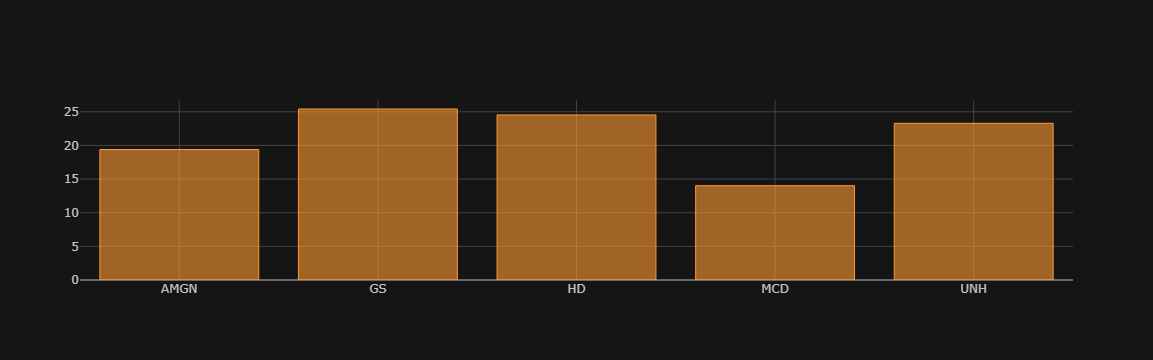

In [27]:
# Plot Mean Annualized Volatility
(daily_returns.std()*np.sqrt(252)*100).iplot(kind='bar')

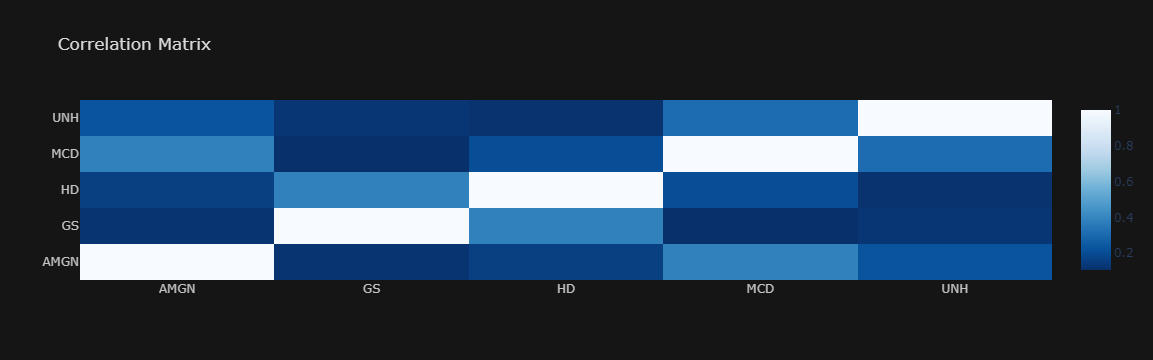

In [28]:
# Plot correlation of returns
daily_returns.corr().iplot(kind='heatmap', title="Correlation Matrix", colorscale="-blues")